In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Let's Create the dataset first

In [17]:
x,y=make_classification(n_samples=2000,weights=[1,1],n_classes=2)

In [18]:
x.shape

(2000, 20)

In [19]:
y.shape

(2000,)

In [21]:
x[1:5]

array([[ 2.44579197e-01,  1.63896306e-01, -1.52642668e+00,
        -6.74621473e-01, -6.11582616e-01, -1.34348781e+00,
         1.91898173e-02, -2.94099397e-01, -1.08509334e+00,
         1.13233350e+00, -7.90888297e-01, -2.75122691e-01,
        -7.85657146e-01,  2.18615407e+00,  1.98451076e-01,
         5.21453138e-01, -1.82441215e+00,  1.22832242e-01,
         6.85740017e-02, -1.00701341e+00],
       [-1.05388098e-01,  2.32498002e+00,  3.48205285e-01,
         7.30376155e-01,  1.45237934e+00,  7.97812636e-02,
         7.25031948e-02,  4.11820722e-01,  3.23147320e+00,
        -1.50076901e+00, -1.01128012e+00,  1.74490311e-01,
        -2.36122126e-01, -3.03514841e-03,  1.53448812e+00,
        -1.80573837e-01,  3.07067258e-02,  9.64238234e-01,
        -1.76322320e+00, -2.63242007e-01],
       [-7.47593605e-01,  2.77486604e-01,  1.67743347e-01,
        -9.32939208e-01, -8.26307754e-01, -7.41350114e-01,
        -2.20484843e+00, -1.15628043e+00, -1.56477923e-01,
         3.60101567e-01, -1.1

# Train_Test_Splitting

In [33]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.7,random_state=1)

In [34]:
train_x

array([[-1.04873778, -0.43316598,  2.1941081 , ...,  0.01148023,
        -0.0485576 , -1.3204462 ],
       [ 0.18581391, -0.15293387,  0.59284276, ...,  0.91851024,
        -0.51588091, -1.82558423],
       [-0.02799377,  0.32913772, -0.72447935, ...,  1.34039017,
        -0.02705356, -0.9276777 ],
       ...,
       [-0.43311218,  0.42136703, -1.7455044 , ...,  0.7547216 ,
         0.41649959, -1.49258291],
       [-0.60729534, -0.65225201,  1.31546847, ..., -0.12014264,
         0.54641555, -1.25692617],
       [ 1.28459338, -0.4933696 , -0.32563676, ..., -0.21017413,
         0.83954626, -0.89635794]])

In [35]:
train_y

array([0, 0, 1, ..., 0, 0, 1])

So this is a binary dataset which is equally balanced.
Now let's apply the classification algorithm to find out the accuracy and do the ROC, AUC Analysis

# Random Forest Classifier

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,roc_curve
classifier_random=RandomForestClassifier(n_estimators=100)
classifier_random.fit(train_x,train_y)

RandomForestClassifier()

In [87]:
y_train_pred=classifier_random.predict_proba(train_x)
y_pred=classifier_random.predict_proba(test_x)
print("The ROC-Train-AUC score for the model is : {}".format(roc_auc_score(train_y,y_train_pred[:,1])))
print("The ROC-Test-AUC score for the model is : {}".format(roc_auc_score(test_y,y_pred[:,1])))

The ROC-Train-AUC score for the model is : 1.0
The ROC-Test-AUC score for the model is : 0.9790570957389909


In [88]:
y_pred=classifier_random.predict_proba(test_x)[::,1]
tr_p,f_p,thresholds=roc_curve(test_y,y_pred)

Let's Plot & see the FPR-TPR Curve

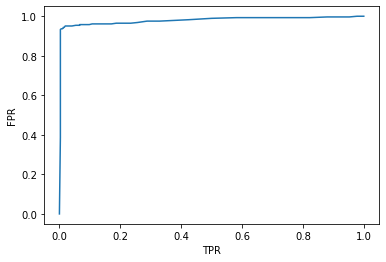

In [75]:
plt.plot(tr_p,f_p)
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

In [76]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.92, 0.9 , 0.89,
       0.88, 0.86, 0.85, 0.82, 0.8 , 0.79, 0.76, 0.75, 0.72, 0.44, 0.43,
       0.4 , 0.39, 0.38, 0.37, 0.36, 0.32, 0.29, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.1 , 0.09, 0.08, 0.07, 0.05, 0.04, 0.03, 0.02, 0.01, 0.  ])

Confusion matrix cannot be plotted at this point due to multiple label types in the target matrix.
To see the confusion matrix, the y_pred label values has to be standardized

# Adaboost Classifier

In [111]:
classifier_adaboost=AdaBoostClassifier()
classifier_adaboost.fit(train_x,train_y)

AdaBoostClassifier()

In [114]:
from sklearn.metrics import auc
y_train_pred=classifier_adaboost.predict_proba(train_x)
y_pred=classifier_adaboost.predict_proba(test_x)
print("The ROC-Train-AUC score for the model is : {}".format(roc_auc_score(train_y,y_train_pred[:,1])))
print("The ROC-Test-AUC score for the model is : {}".format(roc_auc_score(test_y,y_pred[:,1])))

The ROC-Train-AUC score for the model is : 0.9977030269001071
The ROC-Test-AUC score for the model is : 0.9635240238901764


In [120]:
y_pred_binary=classifier_adaboost.predict(test_x)
confusion_matrix(test_y,y_pred_binary)

array([[309,   7],
       [ 29, 255]], dtype=int64)

# KN-Neigbour Classifier

In [129]:
classifier_KNN=KNeighborsClassifier()
classifier_KNN.fit(train_x,train_y)
y_pred=classifier_KNN.predict_proba(test_x)[:,1]

In [132]:
print("The Train ROC-AUC score for the model is : {}".format(roc_auc_score(test_y,y_pred)))

The Train ROC-AUC score for the model is : 0.8934302014619362


# Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(train_x,train_y)
y_pred=log_reg.predict_proba(test_x)[:,1]
print('the ROC-AUC Socre for logistic regression is {}'.format(roc_auc_score(test_y,y_pred)))

the ROC-AUC Socre for logistic regression is 0.9259894811909429


# Let's look at the mean predictions and capture all the predictions by the models in a single matrix

In [144]:
predictions_by_model=[]
for model in [log_reg,classifier_KNN,classifier_adaboost,classifier_random]:
    y_predicted_by_model=model.predict_proba(test_x)[:,1]
    predictions_by_model.append(pd.Series(y_predicted_by_model))
final_preds=pd.concat(predictions_by_model,axis=1)

In [145]:
final_preds

,0,1,2,3
0,0.099174,0.2,0.479768,0.05
1,0.217133,0.6,0.484108,0.37
2,0.281832,0.0,0.489112,0.11
3,0.074776,0.0,0.471352,0.08
4,0.926841,0.6,0.579964,1.00
...,...,...,...,...
595,0.999993,1.0,0.701709,1.00
596,0.079589,0.0,0.475332,0.03
597,0.989254,1.0,0.741506,0.99
598,0.985098,1.0,0.723545,1.00


In [146]:
final_mean_prediction=pd.concat(predictions_by_model,axis=1).mean(axis=1)

In [148]:
print('Mean ROC-AUC Score from the predictions from all the models : {}'.format(roc_auc_score(test_y,final_mean_prediction)))

Mean ROC-AUC Score from the predictions from all the models : 0.971830985915493


# Lets Fetch all the threshold values used by this model in predictions(mean predictions by all the models)

In [150]:
true_positive,false_positive,Thresholds=roc_curve(test_y,final_mean_prediction)

In [158]:
print(type(y_preds_standardized_by_threshold))

<class 'numpy.ndarray'>


# In this step we will be looping though all the thresholds we have got in mean_predicted_y_label values and will replace the y_predicted with 1 where values are greated than threshold and equal to 0 where the y_predicted values are less than the threshold

In [179]:
import numpy as np
from sklearn.metrics import accuracy_score

accuracy_scores_list=[]
for threshold_value in Thresholds:
    y_preds_standardized_by_threshold=np.where(final_mean_prediction>threshold_value,1,0)
    accuracy_score_calculated=accuracy_score(test_y,y_preds_standardized_by_threshold,normalize=True)
    accuracy_scores_list.append(accuracy_score_calculated)
    
performance_basis_threshold_matrix=pd.concat([pd.Series(Thresholds),pd.Series(accuracy_scores_list)],axis=1)
performance_basis_threshold_matrix.columns=['Threshold','Accuracy']
performance_basis_threshold_matrix.sort_values(by='Accuracy',ascending=False,inplace=True)

# We will see the accuracy scores with respect to the threshold values used to do the normalization in the y_predicted values

In [180]:
performance_basis_threshold_matrix

,Threshold,Accuracy
19,0.414384,0.931667
17,0.417810,0.931667
16,0.421399,0.931667
20,0.412432,0.930000
18,0.414903,0.930000
...,...,...
65,0.168095,0.550000
66,0.167897,0.548333
0,1.937168,0.526667
1,0.937168,0.526667


# Here we can conclude that at threshold value "0.414384", the accuracy is coming as maximum